<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/eii_u1_01_22150429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente de correlación:  0.9227
Este coeficiente de correlación nos indica que hay una relación muy positiva ya que es muy cercano a 1

Coeficiente de determinación:  0.8514
El coeficiente de determinación nos indica que el 85.14% de la variación tiene relación con la duración del ejercicio

Intervalo de confianza para b1 de  95%
5.3595 < b1 <  6.1024

valor_p de Breush - pagan:  0.0000



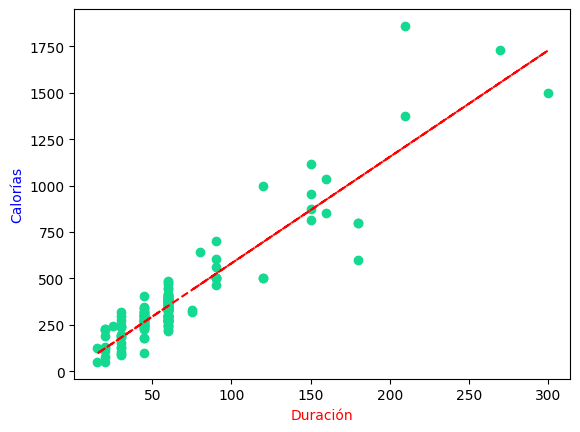

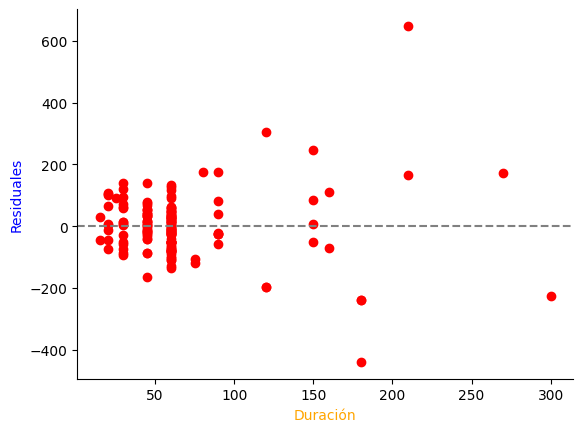

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Angelgz011/estadistica2/refs/heads/main/data.csv")
df.dropna(inplace=True)

# Variable independiente X
X = df['Duration']

# Variable dependiente Y
Y = df['Calories']

#Gráfico de dispersión y recta de regresión ajustada
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = "#13d991")
plt.xlabel('Duración', color= "red")
plt.ylabel('Calorías', color = "blue")

#Inciso b)
#Recta de regresión ajsutada
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1*X
Yc = fun(X)
plt.plot(X, Yc, color = "red", linestyle = "--")



#inciso c)
#Calcular el coeficiente de correlación por medio de una función
from scipy.stats import pearsonr
r,_ = pearsonr(X,Y)
print(f"Coeficiente de correlación: {r : 0.4f}")
print("Este coeficiente de correlación nos indica que hay una relación muy positiva ya que es muy cercano a 1\n")
#Calcular el coeficiente de determinación elevando al cuadrado el coeficiente de correlación
print(f"Coeficiente de determinación: {r**2 : 0.4f}")
print("El coeficiente de determinación nos indica que el 85.14% de la variación tiene relación con la duración del ejercicio\n")



#Inciso d)
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n")

#COMPROBACIÓN CON ANOVA
from statsmodels.formula.api import ols

modelo_2 =ols("Duration ~ Calories", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova

#e) Verifica los supuestos
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = "red")
plt.xlabel("Duración", color = "orange")
plt.ylabel("Residuales", color = "blue")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline( y = 0, color = "gray", linestyle = "--")

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan( residuales, x_constante)
print(f"valor_p de Breush - pagan: {valor_p_bp: 0.4f}\n")
